- Lasso Regresyon -> L1 Yöntemi
- Ridge Regresyon -> L2 Yöntemi
(SSE l1)

Ridge de katsayılar 0 a yaklastırır, lasso 0 yapar.

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [4]:
df=pd.read_csv("/content/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['Division','League','NewLeague']])
y=df["Salary"]
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=42)

In [5]:
lasso_model=Lasso().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [6]:
lasso_model

Lasso()

In [7]:
lasso_model.intercept_


-5.587450677336506

In [8]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [9]:
lasso = Lasso()
coefs = []
alphas=np.random.randint(0,1000,10) #0dan 1000e kadar 10ar 10ar
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.142e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.884e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.664e+06, tolerance: 3.899e

In [10]:
coefs

[array([-1.17247831,  5.64826351,  0.        ,  0.        ,  0.        ,
         2.87276193,  0.        , -0.16785172,  0.21734882, -0.        ,
         1.07805984,  0.47447974, -0.22625954,  0.27322281,  0.18084297,
        -0.        ,  0.        , -0.        ,  0.        ]),
 array([-0.96587854,  5.12299653,  0.        ,  0.        ,  0.        ,
         2.47267295,  0.        , -0.17862367,  0.2730972 , -0.        ,
         1.00419064,  0.46553873, -0.15839315,  0.2720531 ,  0.16311138,
        -0.        ,  0.        , -0.        ,  0.        ]),
 array([ 0.11012461,  2.18880675,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.14716414,  0.25174268,  0.        ,
         0.80092477,  0.3845879 ,  0.01088596,  0.29161092,  0.05183666,
        -0.        ,  0.        , -0.        ,  0.        ]),
 array([ 0.        ,  2.59421347,  0.        ,  0.        ,  0.        ,
         0.19207548,  0.        , -0.17759103,  0.3215469 ,  0.        ,
         0.

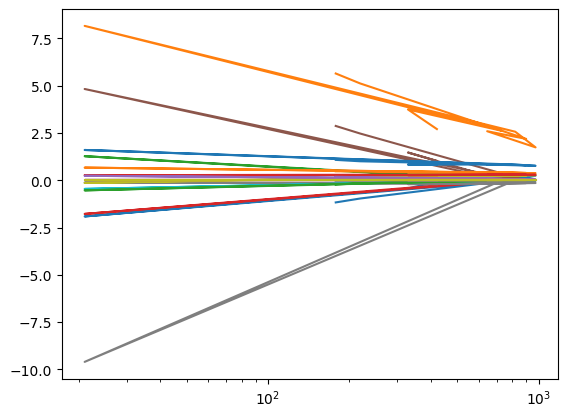

In [11]:
ax=plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

##Tahmin

In [12]:
lasso_model

Lasso()

In [13]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [14]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [15]:
y_pred = lasso_model.predict(X_test)

In [ ]:
y_pred = lasso_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554034

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554034

In [18]:
r2_score(y_test, y_pred)

0.41422798132366156

##Model Tuning

In [25]:
alphas=10**np.linspace(10,-2,100)*0.5

In [29]:
lasso_cv_model= LassoCV(alphas=alphas,cv=10,max_iter=100000).fit(X_train, y_train)

In [30]:
lasso_cv_model.alpha_

201.85086292982749

In [31]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)

In [32]:
y_pred = lasso_model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554034

In [34]:
pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64